## Pre-processing

In [1]:
!pip install kmodes
!pip install kneed

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans

from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="ticks", color_codes=True)

In [3]:
#Loading Data
df_main = pd.read_csv("Data Scientist-Practical Test 1-Customer Demographics Appendix.csv")
df_main

,AGE,OccupationCategory,AnnualIncome,Category
0,0,ACCOUNTING/FINANCE/BANKING,NaN,ACTIVE
1,0,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
2,0,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,VERY ACTIVE
3,0,ADVISORS/AGENTS/INVESTOR,BELOW $30 K,ACTIVE
4,0,AVIATION/TRANSPORT,BELOW $30 K,ACTIVE
...,...,...,...,...
5753,97,NaN,BELOW $30 K,ACTIVE
5754,97,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5755,98,HOME MAKERS,BELOW $30 K,ACTIVE
5756,111,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


In [4]:
#Missing Data
df_main.isnull().sum()

AGE                     0
OccupationCategory     17
AnnualIncome          177
Category                0
dtype: int64

In [5]:
df_null = df_main[df_main.isna().any(axis=1)]
df_null

,AGE,OccupationCategory,AnnualIncome,Category
0,0,ACCOUNTING/FINANCE/BANKING,NaN,ACTIVE
10,0,DISTRIBUTION/ADMIN/MARKETING/HR,NaN,ACTIVE
17,0,ENGINEERING,NaN,ACTIVE
23,0,HOME MAKERS,NaN,ACTIVE
30,0,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,NaN,ACTIVE
...,...,...,...,...
5658,86,DISTRIBUTION/ADMIN/MARKETING/HR,NaN,ACTIVE
5677,87,HOME MAKERS,NaN,ACTIVE
5684,87,RETIREE/UNEMPLOYED,NaN,ACTIVE
5706,89,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,NaN,ACTIVE


In [6]:
df_main = df_main.dropna().reset_index(drop=True)
df_main

,AGE,OccupationCategory,AnnualIncome,Category
0,0,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
1,0,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,VERY ACTIVE
2,0,ADVISORS/AGENTS/INVESTOR,BELOW $30 K,ACTIVE
3,0,AVIATION/TRANSPORT,BELOW $30 K,ACTIVE
4,0,BUYER/VALUER/TRADING,BELOW $30 K,ACTIVE
...,...,...,...,...
5559,96,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5560,97,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5561,98,HOME MAKERS,BELOW $30 K,ACTIVE
5562,111,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


In [7]:
df_main = df_main[df_main["AGE"] != 0].reset_index(drop=True)

age_categories = pd.cut(df_main["AGE"],bins=[17,36,54,72,120],labels=['18-36', '36-54', '54-72', '72-120'])
df_main.insert(1, 'Age Group', age_categories)
df_main


,AGE,Age Group,OccupationCategory,AnnualIncome,Category
0,18,18-36,OTHERS,BELOW $30 K,ACTIVE
1,18,18-36,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE
2,19,18-36,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
3,19,18-36,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE
4,19,18-36,OTHERS,$100 K TO $300 K,ACTIVE
...,...,...,...,...,...
5513,96,72-120,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5514,97,72-120,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5515,98,72-120,HOME MAKERS,BELOW $30 K,ACTIVE
5516,111,72-120,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


## EDA

In [8]:
print(f"There are {df_main.shape[0]} rows and {df_main.shape[1]} columns in the dataset.")

df_main.info()

There are 5518 rows and 5 columns in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518 entries, 0 to 5517
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 5518 non-null   int64   
 1   Age Group           5518 non-null   category
 2   OccupationCategory  5518 non-null   object  
 3   AnnualIncome        5518 non-null   object  
 4   Category            5518 non-null   object  
dtypes: category(1), int64(1), object(3)
memory usage: 178.2+ KB


In [9]:
all_ages = df_main["AGE"].unique()
all_occupations = df_main["OccupationCategory"].unique()
all_incomes = df_main["AnnualIncome"].unique()
all_categories = df_main["Category"].unique()

print(f"All Ages: {all_ages}\n\n")
print(f"All Occupations: {all_occupations}\n\n")
print(f"All Incomes: {all_incomes}\n\n")
print(f"All Categories: {all_categories}")

All Ages: [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 111 120]


All Occupations: ['OTHERS' 'STUDENTS/NATIONAL SERVICE' 'ACCOUNTING/FINANCE/BANKING'
 'DISTRIBUTION/ADMIN/MARKETING/HR' 'TEACHERS/REASERCH/ECONOMIST'
 'DEFENCE/CIVIL SERVICE'
 'MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFICERS/CONSULTANTS'
 'DOCTORS/MEDICAL PROFESSION/HEALTH' 'ENGINEERING' 'TECHNICIAN/WORKER'
 'FOOD/CUSTOMER SERVICES/EVENTS' 'IT PROFESSIONAL/ARCHITECTS'
 'LAWYERS/AUDITORS' 'RETIREE/UNEMPLOYED' 'TUTOR/COACH/TRAINER'
 'DIRECTORS/CEO/EXECUTIVES' 'ADVISORS/AGENTS/INVESTOR'
 'AVIATION/TRANSPORT' 'MEDIA/ARTIST/WRITER' 'REMISIER/DEALERS/REPS'
 'SELF EMPLOYED' 'HOME MAKERS' 'BUYER/VALUER/TRADING'
 'RELIGIOUS/COMMUNITY SERVICES']


Al

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

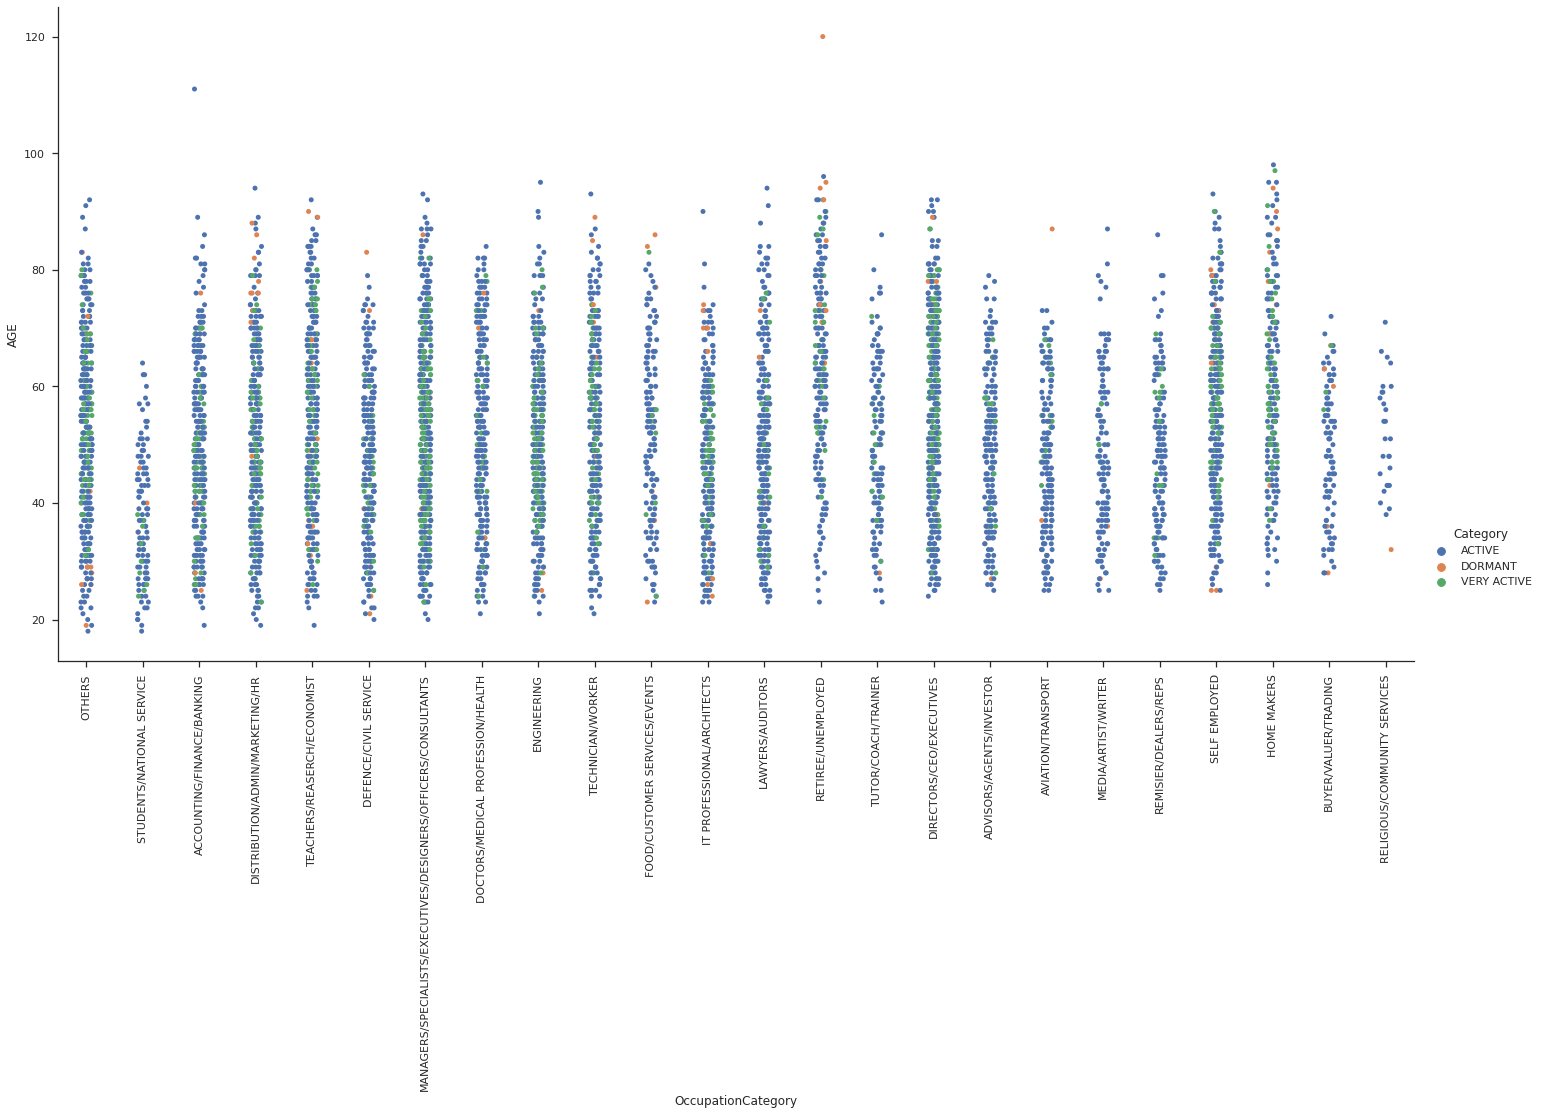

In [ ]:
#ANNUAL INCOME VS OCCUPATION VS CATEGORY GRAPH
sns.catplot(x="OccupationCategory", y="AGE", hue="Category", data=df_main, height=10, aspect=20/10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

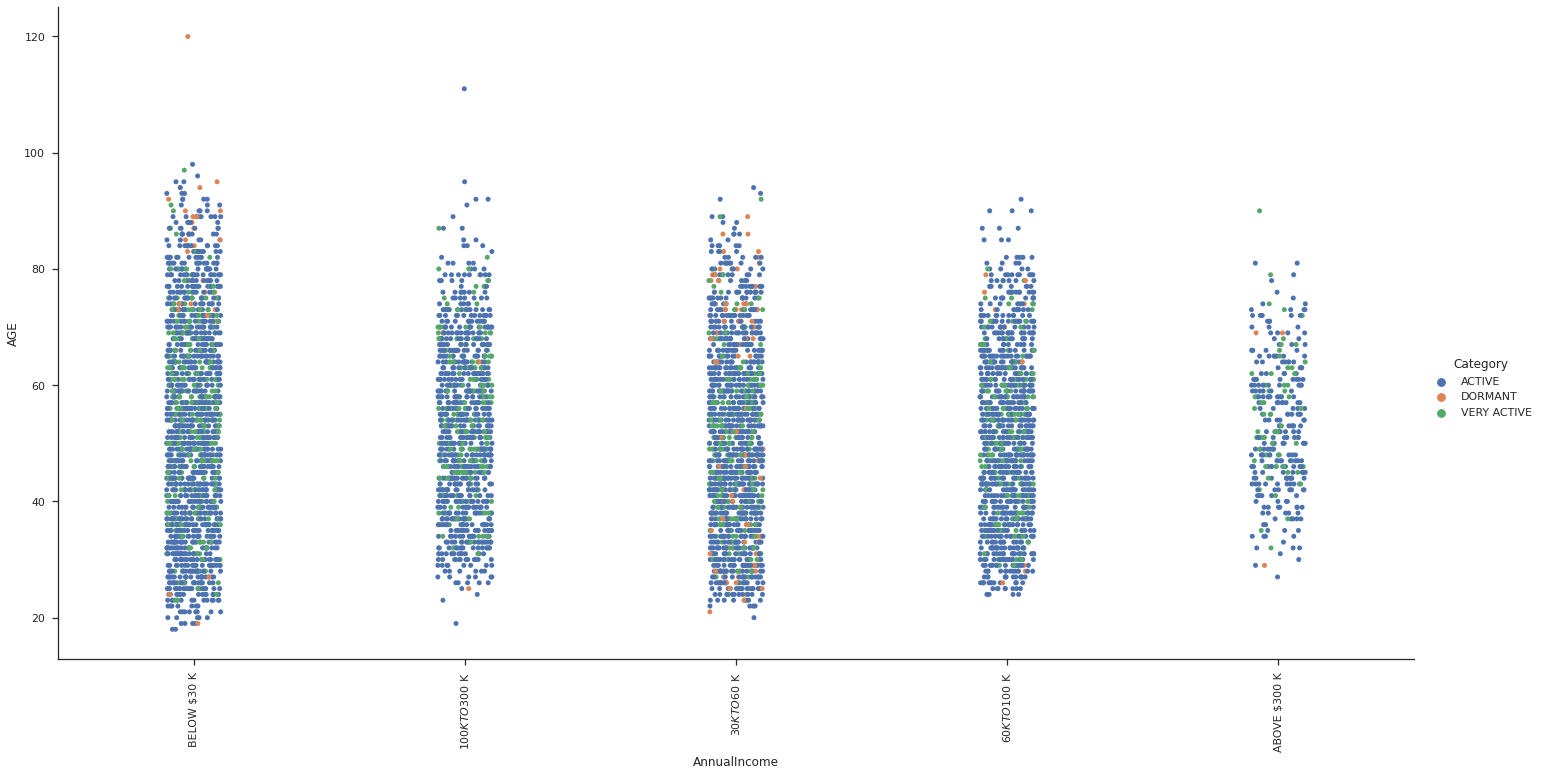

In [10]:
sns.catplot(x="AnnualIncome", y="AGE", hue="Category", data=df_main, height=10, aspect=20/10)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

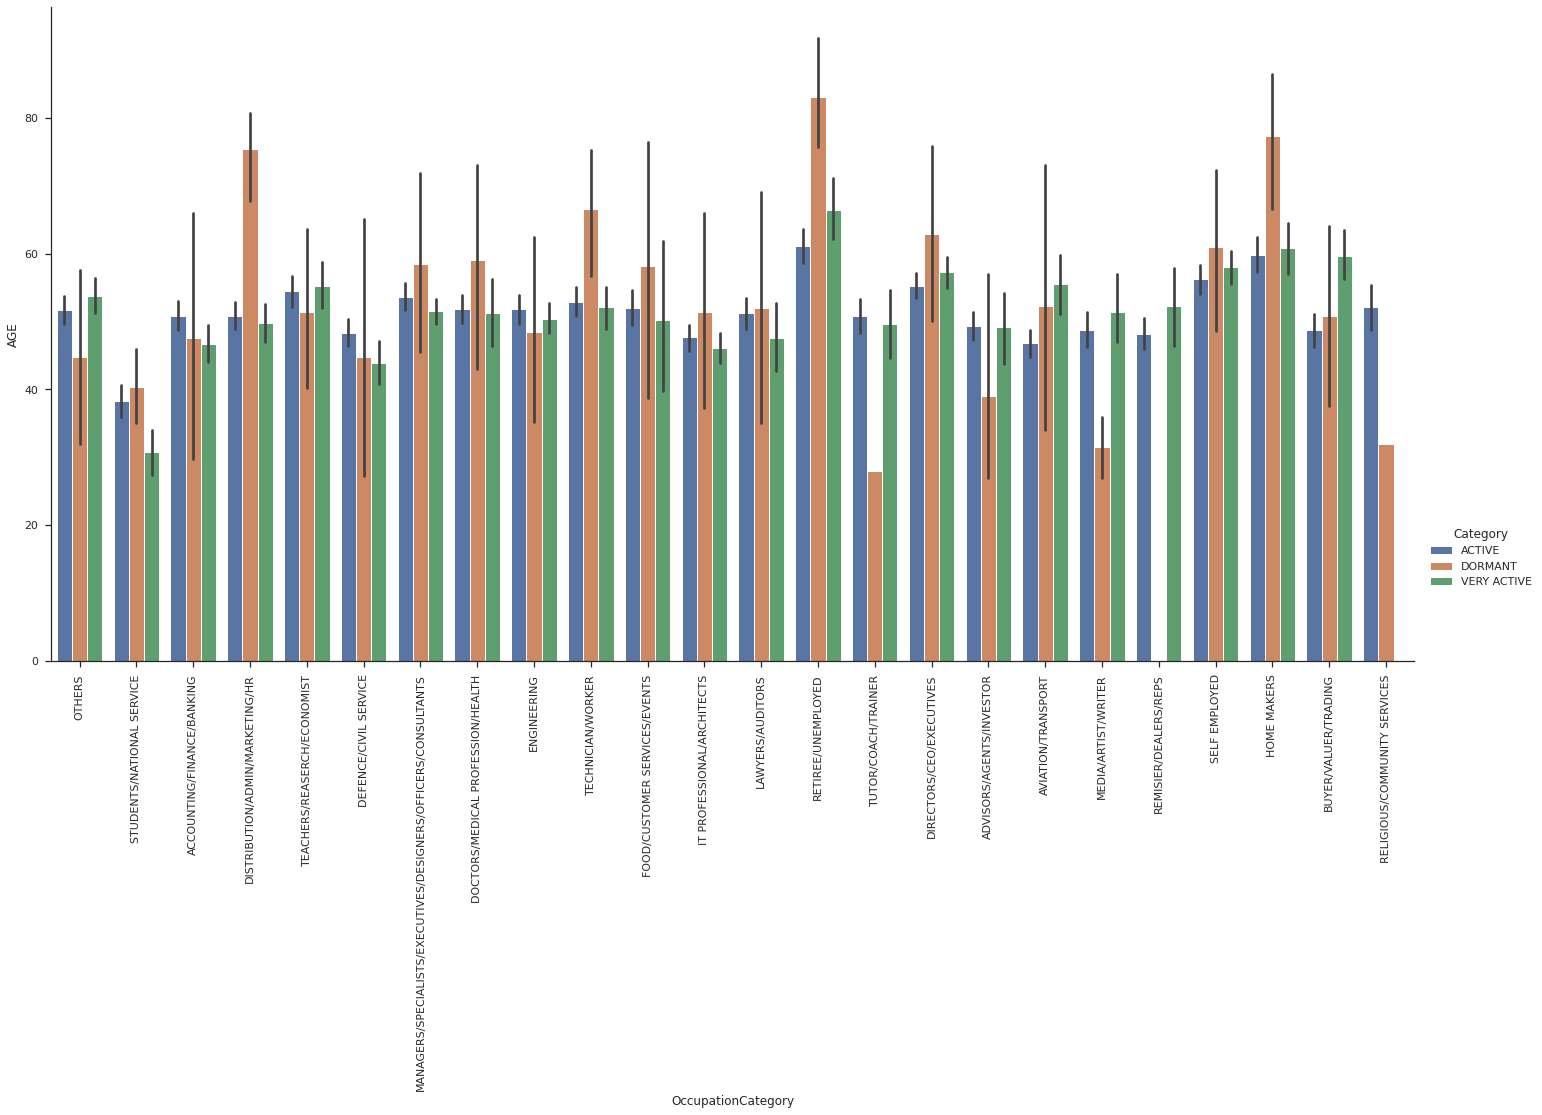

In [ ]:
sns.catplot(x="OccupationCategory", y="AGE", hue="Category", kind="bar", data=df_main, height=10, aspect=20/10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

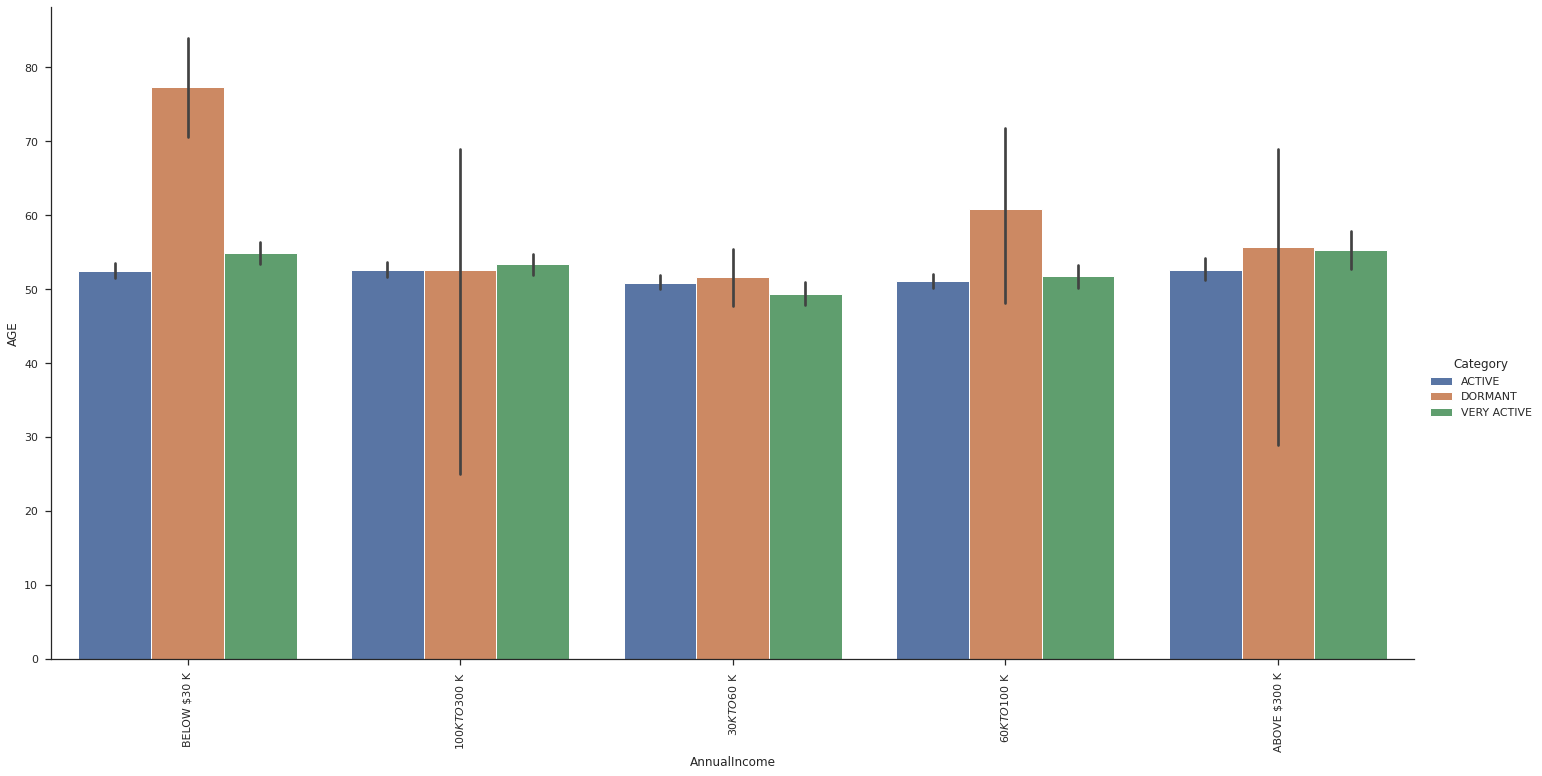

In [11]:
sns.catplot(x="AnnualIncome", y="AGE", hue="Category", kind="bar", data=df_main, height=10, aspect=20/10)
plt.xticks(rotation=90)

## ML

### KModes 

k-modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between data points. k-means algorithm clusters numerical data based on Euclidean distance

The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.

In [ ]:
df_kmodes = df_main.copy()
df_kmodes = df_kmodes.drop(columns=['AGE'])
df_kmodes

,Age Group,OccupationCategory,AnnualIncome,Category
0,18-36,OTHERS,BELOW $30 K,ACTIVE
1,18-36,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE
2,18-36,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
3,18-36,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE
4,18-36,OTHERS,$100 K TO $300 K,ACTIVE
...,...,...,...,...
5513,72-120,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5514,72-120,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5515,72-120,HOME MAKERS,BELOW $30 K,ACTIVE
5516,72-120,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


In [ ]:
# Elbow curve to find optimal K
cost_kmodes = []
num_clusters_kmodes = range(1,30)

for cur_num_cluster in list(num_clusters_kmodes):
    try:
        kmodes = KModes(n_clusters = cur_num_cluster, init = 'random', random_state = 0, verbose=0)
        kmodes.fit_predict(df_kmodes)
        cost_kmodes.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cur_num_cluster))
    except:
        break  

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20
Cluster initiation: 21
Cluster initiation: 22
Cluster initiation: 23
Cluster initiation: 24
Cluster initiation: 25
Cluster initiation: 26
Cluster initiation: 27
Cluster initiation: 28
Cluster initiation: 29


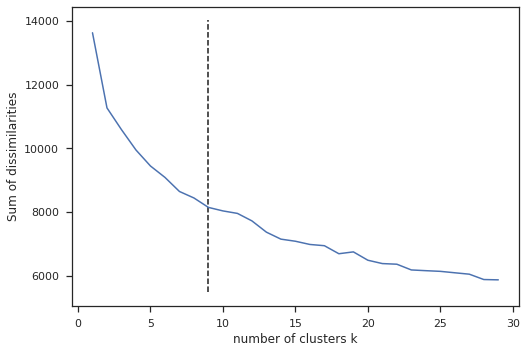

In [ ]:
kn_kmodes = KneeLocator(num_clusters_kmodes, cost_kmodes, curve='convex', direction='decreasing')

plt.xlabel('number of clusters k')
plt.ylabel('Sum of dissimilarities')
plt.plot(num_clusters_kmodes, cost_kmodes, 'bx-')
plt.vlines(kn_kmodes.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

optimal_clusters_kmode = kn_kmodes.knee

Note: Cost is the sum of all the dissimilarities between the clusters.



In [ ]:
kmode = KModes(n_clusters=optimal_clusters_kmode, init = "random", verbose=0, random_state = 0)
clusters = kmode.fit_predict(df_kmodes)
clusters

array([1, 1, 1, ..., 2, 2, 2], dtype=uint16)

In [ ]:
# Cluster centorid
print("CENTROIDS :-")
cols = ["AGE", "Occupation", "CategoryAnnual", "IncomeCategory"]
index = [f'Cluster {i}' for i in range(optimal_clusters_kmode)]
display(pd.DataFrame(kmode.cluster_centroids_, columns = cols, index = index))
print("\n")

# Check the cost of the clusters created
print(f"Cost of the clusters created: {cost_kmodes}\n")

# Check clusters of each row in data
print("NUM OF DATA SAMPLES BELONGING TO EACH CLUSTER :-")
for i in set(clusters):
  print(f"{i}: {list(clusters).count(i)}")

CENTROIDS :-


,AGE,Occupation,CategoryAnnual,IncomeCategory
Cluster 0,36-54,AVIATION/TRANSPORT,$30 K TO $60 K,ACTIVE
Cluster 1,18-36,TEACHERS/REASERCH/ECONOMIST,BELOW $30 K,ACTIVE
Cluster 2,72-120,SELF EMPLOYED,BELOW $30 K,ACTIVE
Cluster 3,36-54,DIRECTORS/CEO/EXECUTIVES,$100 K TO $300 K,VERY ACTIVE
Cluster 4,36-54,TECHNICIAN/WORKER,BELOW $30 K,ACTIVE
Cluster 5,54-72,TEACHERS/REASERCH/ECONOMIST,BELOW $30 K,ACTIVE
Cluster 6,54-72,TEACHERS/REASERCH/ECONOMIST,$60 K TO $100 K,ACTIVE
Cluster 7,18-36,DEFENCE/CIVIL SERVICE,$30 K TO $60 K,ACTIVE
Cluster 8,54-72,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,BELOW $30 K,VERY ACTIVE




Cost of the clusters created: [13628.0, 11269.0, 10587.0, 9948.0, 9446.0, 9088.0, 8646.0, 8442.0, 8146.0, 8036.0, 7958.0, 7723.0, 7369.0, 7150.0, 7084.0, 6983.0, 6944.0, 6692.0, 6750.0, 6488.0, 6383.0, 6363.0, 6183.0, 6160.0, 6139.0, 6094.0, 6050.0, 5882.0, 5872.0]

NUM OF DATA SAMPLES BELONGING TO EACH CLUSTER :-
0: 1747
1: 717
2: 483
3: 511
4: 429
5: 670
6: 385
7: 311
8: 265


In [ ]:
#RUN THE FOLLOWING CELL AND SEE THE DATA FROM THE PREVIOUS CENTROIDS TABLE TO DRAW INFERENCES WHY THE PARTICULAR CENTROID WAS CHOSEN BASED ON NUMBERS
# df_main["Age Group"].value_counts()
# df_main["OccupationCategory"].value_counts()
# df_main["AnnualIncome"].value_counts()

In [ ]:
df_clusters_kmodes = df_kmodes.copy()
df_clusters_kmodes.insert(4, "Cluster", clusters, True)
df_clusters_kmodes

,Age Group,OccupationCategory,AnnualIncome,Category,Cluster
0,18-36,OTHERS,BELOW $30 K,ACTIVE,1
1,18-36,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE,1
2,18-36,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE,1
3,18-36,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE,1
4,18-36,OTHERS,$100 K TO $300 K,ACTIVE,1
...,...,...,...,...,...
5513,72-120,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE,2
5514,72-120,HOME MAKERS,BELOW $30 K,VERY ACTIVE,2
5515,72-120,HOME MAKERS,BELOW $30 K,ACTIVE,2
5516,72-120,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE,2


In [ ]:
# sns.catplot(x="OccupationCategory", y="Age Group", hue="Cluster", data=df_clusters, height=10, aspect=20/10)
# plt.xticks(rotation=90)

In [ ]:
# sns.relplot(data=df_clusters, x='OccupationCategory', y='Age Group', hue='Cluster', height=10, aspect=20/10)
# plt.xticks(rotation=90)
# plt.show()

### KPrototype


In [ ]:
scale = StandardScaler()

df_kproto = df_main.copy()
df_kproto = df_kproto.drop(columns=["Age Group"]).reset_index(drop=True)
df_kproto["AGE"] = scale.fit_transform(df_kproto[["AGE"]])
df_kproto

,AGE,OccupationCategory,AnnualIncome,Category
0,-2.171054,OTHERS,BELOW $30 K,ACTIVE
1,-2.171054,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE
2,-2.107559,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
3,-2.107559,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE
4,-2.107559,OTHERS,$100 K TO $300 K,ACTIVE
...,...,...,...,...
5513,2.781591,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5514,2.845086,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5515,2.908582,HOME MAKERS,BELOW $30 K,ACTIVE
5516,3.734022,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


In [ ]:
# Elbow curve to find optimal K
cost_kproto = []
num_clusters_kproto = range(1,30)

for cur_num_cluster in list(num_clusters_kproto):
      kproto = KPrototypes(n_clusters = cur_num_cluster, init = 'random', random_state = 0, verbose=0)
      kproto.fit_predict(df_kproto, categorical = [1,2,3])
      cost_kproto.append(kproto.cost_)
      print('Cluster initiation: {}'.format(cur_num_cluster))


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20
Cluster initiation: 21
Cluster initiation: 22
Cluster initiation: 23
Cluster initiation: 24
Cluster initiation: 25
Cluster initiation: 26
Cluster initiation: 27
Cluster initiation: 28
Cluster initiation: 29


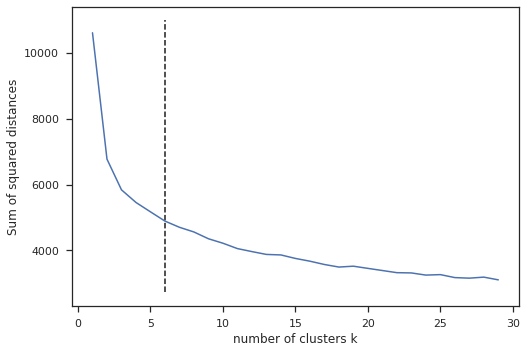

In [ ]:
kn_kproto = KneeLocator(num_clusters_kproto, cost_kproto, curve='convex', direction='decreasing')

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(num_clusters_kproto, cost_kproto, 'bx-')
plt.vlines(kn_kproto.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

optimal_clusters_kproto = kn_kproto.knee

In [ ]:
kproto = KPrototypes(n_clusters=optimal_clusters_kproto, init = "random", verbose=0, random_state = 0)
clusters = kproto.fit_predict(df_kproto, categorical = [1,2,3])
clusters

array([5, 5, 5, ..., 2, 2, 2], dtype=uint16)

In [ ]:
# Cluster centorid
print("CENTROIDS :-")
cols = ["AGE", "Occupation", "CategoryAnnual", "IncomeCategory"]
index = [f'Cluster {i}' for i in range(optimal_clusters_kproto)]
display(pd.DataFrame(kproto.cluster_centroids_, columns = cols, index = index))
print("\n")


# Check the cost of the clusters created
print(f"Cost of the clusters created: {cost_kproto}\n")

# Check clusters of each row in data
print("NUM OF DATA SAMPLES BELONGING TO EACH CLUSTER :-")
for i in set(clusters):
  print(f"{i}: {list(clusters).count(i)}")

CENTROIDS :-


,AGE,Occupation,CategoryAnnual,IncomeCategory
Cluster 0,-0.3778234710675814,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE
Cluster 1,0.028614654062942318,ENGINEERING,BELOW $30 K,ACTIVE
Cluster 2,1.4492153937577696,DIRECTORS/CEO/EXECUTIVES,BELOW $30 K,ACTIVE
Cluster 3,0.5237107906952523,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,$30 K TO $60 K,ACTIVE
Cluster 4,-0.9307141111939577,DEFENCE/CIVIL SERVICE,$30 K TO $60 K,ACTIVE
Cluster 5,-1.3234968914146008,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,BELOW $30 K,ACTIVE




Cost of the clusters created: [10617.999999999873, 6775.103514557101, 5841.798878260171, 5457.859719599137, 5172.553650737677, 4891.358052858411, 4702.6536101055235, 4560.167244367128, 4354.1057990972495, 4218.331813121448, 4055.017872938272, 3963.733144819074, 3877.44886975088, 3861.943258983521, 3755.8064126179424, 3671.9716814556637, 3571.5560480987942, 3493.6127665938466, 3519.9188993005682, 3453.5322146550657, 3388.357549111245, 3322.882037731833, 3314.828540083166, 3249.1964554875535, 3263.5814817365845, 3173.158987433954, 3155.9989119022443, 3187.232946554169, 3104.3599866224777]

NUM OF DATA SAMPLES BELONGING TO EACH CLUSTER :-
0: 831
1: 899
2: 1049
3: 1122
4: 816
5: 801


In [ ]:
df_clusters_kproto = df_kproto.copy()
df_clusters_kproto.insert(4, "Cluster", clusters, True)
df_clusters_kproto

,AGE,OccupationCategory,AnnualIncome,Category,Cluster
0,-2.171054,OTHERS,BELOW $30 K,ACTIVE,5
1,-2.171054,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE,5
2,-2.107559,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE,5
3,-2.107559,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE,5
4,-2.107559,OTHERS,$100 K TO $300 K,ACTIVE,5
...,...,...,...,...,...
5513,2.781591,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE,2
5514,2.845086,HOME MAKERS,BELOW $30 K,VERY ACTIVE,2
5515,2.908582,HOME MAKERS,BELOW $30 K,ACTIVE,2
5516,3.734022,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE,2


### PCA

In [ ]:
#One-hot Encoding the DataFrame
df_full_encoded = df_main.copy()
df_full_encoded = df_full_encoded.drop(columns=['Age Group'])
x = list(df_full_encoded.columns)
x.remove("AGE")

for col in x:
  one_hot = pd.get_dummies(df_full_encoded[col])
  df_full_encoded = df_full_encoded.drop(col,axis = 1)
  df_full_encoded = df_full_encoded.join(one_hot)

df_full_encoded["AGE"] = StandardScaler().fit_transform(df_full_encoded[["AGE"]])

df_full_encoded

,AGE,ACCOUNTING/FINANCE/BANKING,ADVISORS/AGENTS/INVESTOR,AVIATION/TRANSPORT,BUYER/VALUER/TRADING,DEFENCE/CIVIL SERVICE,DIRECTORS/CEO/EXECUTIVES,DISTRIBUTION/ADMIN/MARKETING/HR,DOCTORS/MEDICAL PROFESSION/HEALTH,ENGINEERING,...,TECHNICIAN/WORKER,TUTOR/COACH/TRAINER,$100 K TO $300 K,$30 K TO $60 K,$60 K TO $100 K,ABOVE $300 K,BELOW $30 K,ACTIVE,DORMANT,VERY ACTIVE
0,-2.171054,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,-2.171054,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,-2.107559,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,-2.107559,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,-2.107559,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,2.781591,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5514,2.845086,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5515,2.908582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5516,3.734022,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


**Explained_variance_ratio_ndarray :**  Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

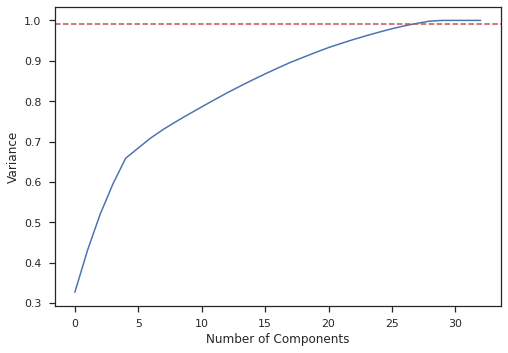

In [ ]:
#Number of components vs explained variance plot

threshold = 0.99 # Threshold of explained variance
pca = PCA().fit(df_full_encoded) #Fitting the PCA algorithm with our Data

#Plotting the Cumulative Summation of the Explained Variance
# fig = plt.figure(figsize=(25,10))
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(threshold, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance') #for each component
plt.show()

In [ ]:
def cumulativeExplainedVariance(S, k_range):
    
    variance_ratio = np.zeros(k_range) # Cumulative explained variance ratio

    for i in range(k_range):
        variance_ratio[i] = np.sum(S[0:i+1])/np.sum(S)
    
    return variance_ratio

def pca(X, k):

    m = np.size(X, axis=0) # Number of examples
    
    sigma = (1/m)*X.T.dot(X) # Covariance Matrix

    [U, S, V] = np.linalg.svd(sigma) # Singular Decomposition Value
    
    Ur = U[:, 0:k] # U reduce

    Z = X.dot(Ur) # Projected data of k-dimensions
    
    return Z, S

n_features = df_full_encoded.shape[1] # Number of features
n_components = np.arange(1, n_features)
k_range = n_features-1

Z, S = pca(df_full_encoded, n_features)
variance_ratio = cumulativeExplainedVariance(S, k_range)

curr_ratio = variance_ratio[variance_ratio >= threshold][0]
n_features_optimal = n_components[variance_ratio == curr_ratio][0]

print(f'k = {n_features_optimal} is the smallest value of k with cumulative explained variance ratio of {curr_ratio}, which is higher than the threshold of {threshold}')

k = 29 is the smallest value of k with cumulative explained variance ratio of 0.9944980753890972, which is higher than the threshold of 0.99


In [ ]:
df_full_encoded = pd.DataFrame(PCA(n_components=n_features_optimal).fit_transform(df_full_encoded)) #Fitting the PCA algorithm with our Data
df_full_encoded

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-2.141625,-0.258425,0.855131,-0.218198,0.023305,0.077656,-0.051102,0.502713,-0.693376,-0.323219,...,-0.043974,0.027990,-0.088247,-0.031223,-0.053936,-0.025926,-0.035439,-0.037115,-0.070971,-0.009642
1,-2.158400,-0.277902,0.870328,-0.237839,-0.000236,0.001384,-0.026693,-0.069071,-0.019976,0.003921,...,0.073642,-0.041341,-0.021471,-0.005510,0.012064,0.015994,0.023099,0.060355,0.928032,-0.137564
2,-2.085288,-0.272776,0.847271,-0.210344,0.004544,0.000779,-0.056137,0.025080,0.086533,0.267768,...,-0.067333,0.070691,-0.082385,-0.029955,-0.054175,-0.028117,-0.034003,-0.036219,-0.068294,-0.010724
3,-2.080403,-0.263356,0.849824,-0.223051,0.011778,0.005731,-0.070259,0.126881,0.624268,-0.660065,...,-0.045490,0.034658,-0.085927,-0.030999,-0.053092,-0.023995,-0.033399,-0.036161,-0.068612,-0.009375
4,-2.102921,-0.212662,-0.083326,0.413546,0.860907,-0.018048,-0.082835,0.515129,-0.686281,-0.315320,...,0.018934,0.025296,-0.103126,-0.050286,-0.034927,0.003094,-0.008694,-0.040926,-0.043297,-0.004770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,2.823093,-0.405735,0.635420,-0.270455,-0.078958,-0.096371,-0.039366,-0.008445,-0.001350,-0.014953,...,0.058454,-0.707622,-0.244996,-0.064994,-0.093148,-0.028209,-0.047124,-0.028034,-0.008134,-0.015214
5514,2.916412,1.002395,0.711583,-0.211978,-0.155498,-0.143361,-0.110394,0.034625,0.016050,0.001120,...,0.742773,0.150922,-0.128680,-0.037652,-0.045303,-0.005699,-0.022200,-0.000460,0.016109,-0.004551
5515,2.944504,-0.398573,0.641037,-0.283231,-0.091579,-0.107611,-0.047192,-0.021523,-0.008543,-0.021611,...,0.741643,0.214506,-0.167095,-0.055546,-0.064836,-0.026492,-0.030606,-0.024019,0.005215,-0.015237
5516,3.713460,-0.376823,-0.363924,0.383135,0.748639,-0.176532,-0.082507,0.089373,0.105355,0.249853,...,-0.153741,0.103138,0.034307,0.013248,0.002450,-0.013948,0.006237,0.002469,0.072008,-0.005651


### KMeans

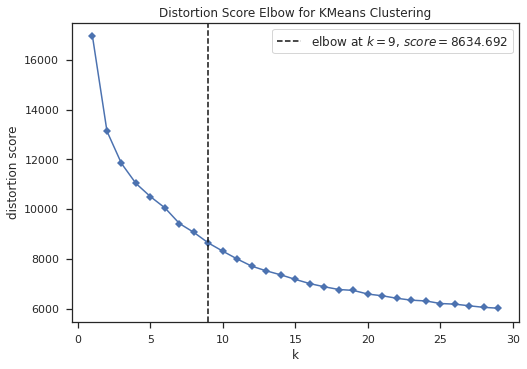

In [ ]:
#TODO USE PCA TO REDUCE DIMENSIONS ACCRDING TO VAR GRAPH

#TRAINING
kmeans = KMeans(random_state = 0) #Applying Kmeans classifier
visualizer = KElbowVisualizer(kmeans, locate_elbow=True, timings=False, k=(1,30))
visualizer.fit(df_full_encoded)  
visualizer.show()

In [ ]:
optimal_clusters_kmeans = visualizer.elbow_value_
cost_kmeans = visualizer.elbow_score_

print(f"Kmeans elbow at k={optimal_clusters_kmeans} with cost={cost_kmeans}")

Kmeans elbow at k=9 with cost=8634.692388466834


In [ ]:
kmeans = KMeans(n_clusters = optimal_clusters_kmeans, random_state = 0).fit(df_full_encoded) #Applying Kmeans classifier

In [ ]:
df_clusters_kmeans = df_main.copy()
df_clusters_kmeans = df_clusters_kmeans.drop(columns=["Age Group"])
df_clusters_kmeans.insert(4, 'Cluster', kmeans.labels_)

df_clusters_kmeans

,AGE,OccupationCategory,AnnualIncome,Category,Cluster
0,18,OTHERS,BELOW $30 K,ACTIVE,5
1,18,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE,5
2,19,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE,5
3,19,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE,5
4,19,OTHERS,$100 K TO $300 K,ACTIVE,0
...,...,...,...,...,...
5513,96,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE,1
5514,97,HOME MAKERS,BELOW $30 K,VERY ACTIVE,1
5515,98,HOME MAKERS,BELOW $30 K,ACTIVE,1
5516,111,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE,8
